In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn.metrics as metrics
# Untuk Algoritma nya
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [4]:
df = pd.read_csv("diabetes (1).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

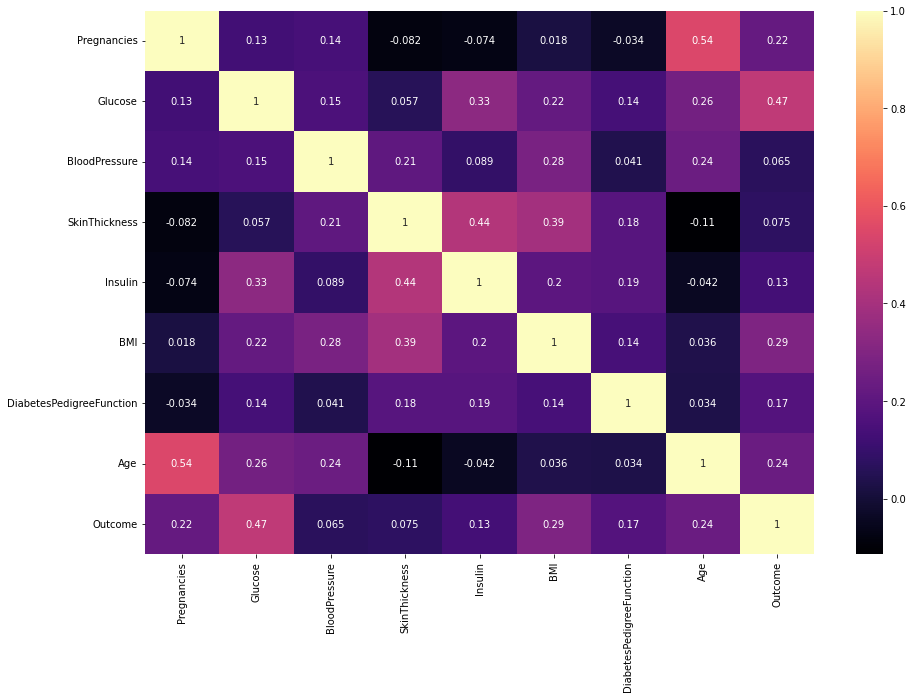

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='magma', annot=True)
plt.show()

Text(0, 0.5, 'Jumlah')

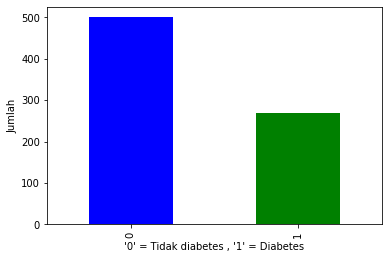

In [8]:
df['Outcome'].value_counts().plot(kind='bar',color=['blue','green'])
plt.xlabel("'0' = Tidak diabetes , '1' = Diabetes")
plt.ylabel("Jumlah")

In [9]:
# Variabel Independen 
X = df.iloc[:,:8]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
y = df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [12]:
n_neighbors =1
k_rang= list(range(2, 50))
model_params = {
    'decision_tree' : {
        'model': DecisionTreeClassifier(),
        'params' : {
            'max_depth' : [3,4,5,7]        
        }
    },
    'knn' : {
        'model' : KNeighborsClassifier(n_neighbors=n_neighbors),
        'params' : {
            'n_neighbors' : [i for i in range(1,12)]
        }
    },
    'logistic_regression' :{
        'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' :{
            'C' : [10,50,100]
        }
    },
    'naive_bayes' : {
        'model' : GaussianNB(),
        'params' : {
            
        }
    }
}

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import pandas as pd 
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model' : algo,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
        })
    best_estimators[algo] = clf.best_estimator_

cek = pd.DataFrame(scores,columns=['model','best_score','best_params'])
cek

,model,best_score,best_params
0,decision_tree,0.733818,{'max_depth': 3}
1,knn,0.728210,{'n_neighbors': 11}
2,logistic_regression,0.778487,{'C': 50}
3,naive_bayes,0.758013,{}


In [22]:
from sklearn.metrics import classification_report
predict = {}
for b,k in best_estimators.items():
    predict[b] = k.predict(X_test)

print(f"\t\tDecision Tree\n{classification_report(y_test, predict['decision_tree'])}\n\n")
print(f"\t\tKNN\n{classification_report(y_test, predict['knn'])}\n\n")
print(f"\t\tLogistic Regression\n{classification_report(y_test, predict['logistic_regression'])}\n\n")
print(f"\t\tNaive Bayes\n{classification_report(y_test, predict['naive_bayes'])}\n\n")


		Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       155
           1       0.64      0.58      0.61        76

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.75      0.75      0.75       231



		KNN
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       155
           1       0.69      0.54      0.61        76

    accuracy                           0.77       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



		Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.88      0.83       155
           1       0.67      0.47      0.55        76

    accuracy                           0.75       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.74   